In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
ad=pd.read_csv("C://Users//Admin//Desktop//New folder//admission.csv")

In [7]:
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
ad.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
ad.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data=ad.drop(labels=['Serial No.','Research'], axis=1)

In [11]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [14]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [15]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.762146e-15,1.136868e-15,1.421085e-16,-8.526513e-17,4.263256e-17,3.119283e-15,-3.304024e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.346008e+00,-2.500419e+00,-1.850542e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-2.707391e+00
25%,-7.508077e-01,-6.899523e-01,-9.751676e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-6.506420e-01
50%,4.679255e-02,-3.160087e-02,-9.979274e-02,1.272712e-01,1.730621e-02,-2.720919e-02,-1.234050e-02
75%,7.557706e-01,7.913384e-01,7.755821e-01,6.323155e-01,5.581253e-01,7.672196e-01,6.968834e-01
max,2.085104e+00,2.108041e+00,1.650957e+00,1.642404e+00,1.639763e+00,2.223672e+00,1.760719e+00


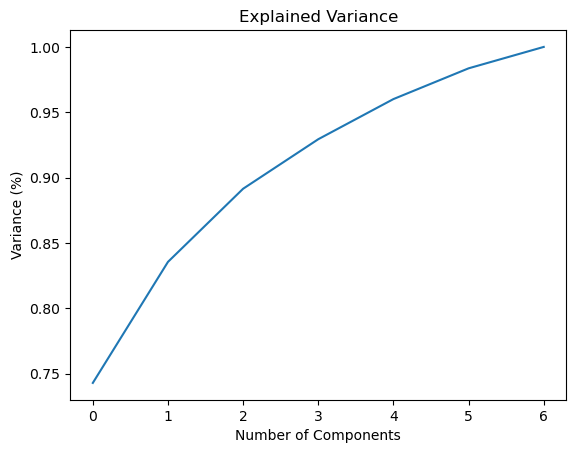

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [17]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
principal_Df = pd.DataFrame(data = new_data , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [18]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-3.736468,-0.665595,-0.384892,0.258456
1,-1.428952,0.728441,-0.151722,-0.230017
2,0.781105,0.214053,-0.104728,-0.298225
3,-0.309693,-1.129572,0.531347,0.341143
4,1.837612,-0.610202,-0.585461,-0.389948


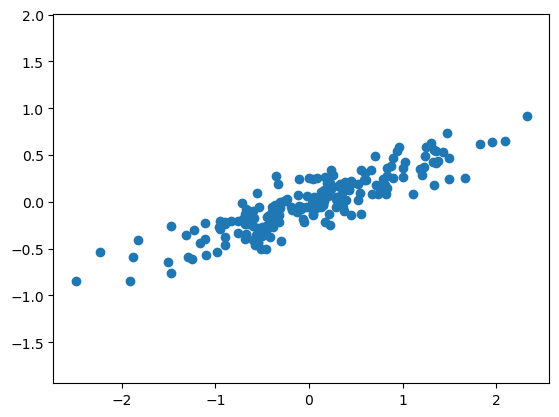

In [19]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

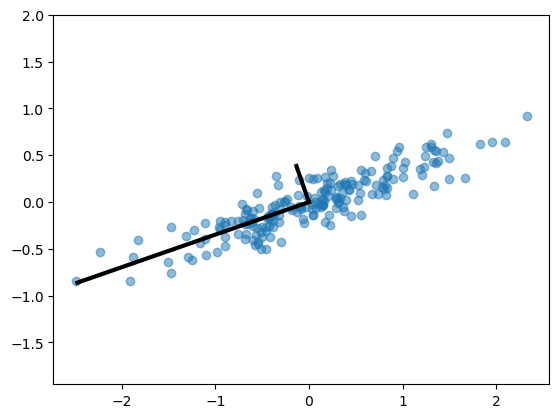

In [21]:

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [22]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


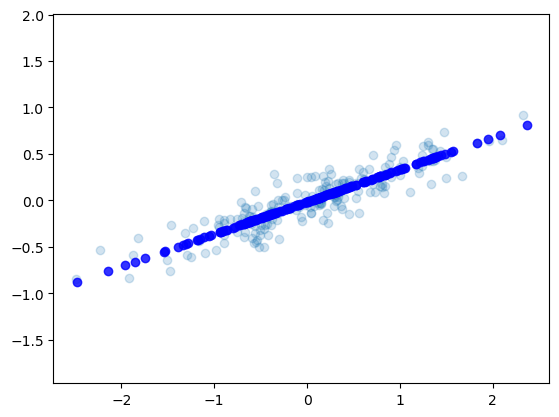

In [23]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');
